# **2장. 머신러닝의 기초 모델 이해하기 — 회귀와 분류**

## **2-2 분류 문제와 로지스틱 회귀 모델**


📌[실습 02-22] 라이브러리 설치하기

In [ ]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 30.6 MB/s eta 0:00:00


### 원핫(one hot) 인코딩

📌[실습 02-23] 데이터 프레임 생성하기

In [ ]:
df=pd.DataFrame(["체리", "망고", "키위"], columns=["브랜드"])
print(df)

  브랜드
0  체리
1  망고
2  키위


📌[실습 02-24] 원핫 인코딩 적용하기

In [ ]:
y_oh=pd.get_dummies(df["브랜드"])               # True/False
#y_oh=pd.get_dummies(df["브랜드"]).astype(int)  # 0/1
print("원핫 인코딩 결과")
print(y_oh)


원핫 인코딩 결과
      망고     체리     키위
0  False   True  False
1   True  False  False
2  False  False   True


### 소프트맥스 함수 이해하기

📌[실습 02-25] 소프트맥스 함수 정의하기

In [ ]:
def softmax(x):
    exp_x=np.exp(x)
    return exp_x/np.sum(exp_x)
# 함수 호출
softmax([3, 3])


array([0.5, 0.5])

📌[실습 02-26] 다른 입력값을 넣었을 경우

In [ ]:
softmax([1, -1])

array([0.88079708, 0.11920292])

In [ ]:
softmax([3, 3, 3, 3])

array([0.25, 0.25, 0.25, 0.25])

### 로지스틱 회귀 모델로 예측하기

📌[실습 02-27] 데이터 불러오기

In [ ]:
df=pd.read_csv("브랜드선택.csv", encoding='cp949')
df

,표본_id,나이,소득,지역,브랜드
0,1,30,380,B,망고
1,2,33,290,B,키위
2,3,63,950,C,체리
3,4,24,420,A,망고
4,5,22,370,C,체리
...,...,...,...,...,...
195,196,43,480,A,키위
196,197,22,280,B,망고
197,198,50,730,A,체리
198,199,35,460,A,키위


📌[실습 02-28] 열 변수의 자료형 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본_id   200 non-null    int64 
 1   나이      200 non-null    int64 
 2   소득      200 non-null    int64 
 3   지역      200 non-null    object
 4   브랜드     200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


📌[실습 02-29] 기초 통계 확인하기 — 빈도

<Axes: xlabel='브랜드'>

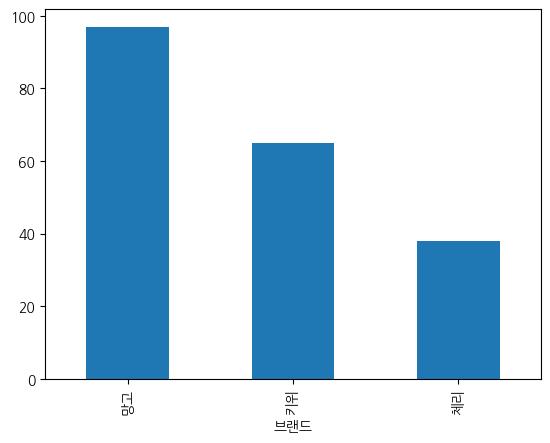

In [ ]:
#df['브랜드'].value_counts()
df['브랜드'].value_counts().plot.bar()

📌[실습 02-30] 기초 통계 확인하기 — 평균 나이

In [ ]:
df.groupby("브랜드")[["나이"]].mean()

,나이
브랜드,
망고,27.659794
체리,38.605263
키위,35.615385


기초 통계 확인하기 — 브랜드의 지역별 분포

In [ ]:
df.groupby("브랜드")[["지역"]].value_counts()

브랜드  지역
망고   B     53
     C     28
     A     16
체리   A     25
     C     12
     B      1
키위   A     25
     B     23
     C     17
Name: count, dtype: int64

###로지스틱 회귀 모델로 예측 확률과 손실 평가하기

In [ ]:
# 📌 [실습 02-31] 변수와 파라미터 지정하기
X=df["나이"]
y_oh=pd.get_dummies(df['브랜드']).astype(int)  # 원핫 인코딩 적용
print("원핫 타깃")
print(y_oh); print()

# 파라미터 지정
w=[-0.05, 0.01, 0.05]
b=[0, 0, 0]

# 📌 [실습 02-32] 클래스별 선형 함수 결과 z 계산하기
#z=pd.DataFrame([])
z_0=w[0]*X + b[0]  # 선형함수_0
z_1=w[1]*X + b[1]  # 선형함수_1
z_2=w[2]*X + b[2]  # 선형함수_2

# 📌 [실습 02-33] 소프트맥스 함수로 예측 확률 계산하기
예측_확률=pd.DataFrame([])
예측_확률['망고']=np.exp(z_0) / (np.exp(z_0) + np.exp(z_1) + np.exp(z_2))
예측_확률['체리']=np.exp(z_1) / (np.exp(z_0) + np.exp(z_1) + np.exp(z_2))
예측_확률['키위']=np.exp(z_2) / (np.exp(z_0) + np.exp(z_1) + np.exp(z_2))
print("예측 확률")
print(np.round(예측_확률,3));print()

# 📌 [실습 02-34] 크로스 엔트로피 계산하기
CE=-(np.log(예측_확률['체리']*y_oh['체리'] + 예측_확률['키위']*y_oh['키위']  + 예측_확률['망고']*y_oh['망고']  ))
print("크로스 엔트로피")
print(CE); print()
print("평균 크로스_엔트로피=", np.mean(CE))

원핫 타깃
     망고  체리  키위
0     1   0   0
1     0   0   1
2     0   1   0
3     1   0   0
4     0   1   0
..   ..  ..  ..
195   0   0   1
196   1   0   0
197   0   1   0
198   0   0   1
199   0   1   0

[200 rows x 3 columns]

예측 확률
        망고     체리     키위
0    0.037  0.223  0.740
1    0.028  0.205  0.767
2    0.002  0.074  0.924
3    0.062  0.260  0.679
4    0.073  0.272  0.655
..     ...    ...    ...
195  0.011  0.150  0.838
196  0.073  0.272  0.655
197  0.006  0.118  0.876
198  0.024  0.193  0.783
199  0.024  0.193  0.783

[200 rows x 3 columns]

크로스 엔트로피
0      3.300831
1      0.265451
2      2.599085
3      2.787716
4      1.302379
         ...   
195    0.176165
196    2.622379
197    2.132845
198    0.244353
199    1.644353
Length: 200, dtype: float64


평균 크로스_엔트로피= 1.9241744250749953


📌[실습 02-35] 문자형 타깃을 정수형으로 변환하기(라벨 인코딩)

In [ ]:
from sklearn.preprocessing import LabelEncoder   # 클래스(설계도)
le=LabelEncoder()                                # 인스턴스(instance)
df['브랜드_idx']=le.fit_transform(df['브랜드'])
df.head(5)

,표본_id,나이,소득,지역,브랜드,브랜드_idx
0,1,30,380,B,망고,0
1,2,33,290,B,키위,2
2,3,63,950,C,체리,1
3,4,24,420,A,망고,0
4,5,22,370,C,체리,1


📌[실습 02-36] 로지스틱 회귀 모델 학습하기

In [ ]:
# 피쳐와 타겟 지정
X=df[['나이']]     # 2차원 배열임에 주의
y=df['브랜드_idx'] # 라벨 인코딩된 타겟을 사용

# 로지스틱 회귀 분석
model=LogisticRegression(max_iter=1000)
model.fit(X, y) # 모델 학습

# 예측 확률 및 예측 클래스 출력
y_prob=model.predict_proba(X)
y_pred=model.predict(X);
print("예측 확률(처음 5개):"); print()
print(np.round(y_prob[:5],3)); print()
print("예측 클래스_인덱스(처음 5개):")
print(y_pred[:5])


예측 확률(처음 5개):

[[0.558 0.137 0.305]
 [0.393 0.203 0.404]
 [0.001 0.609 0.391]
 [0.826 0.046 0.128]
 [0.88  0.03  0.09 ]]

예측 클래스_인덱스(처음 5개):
[0 2 1 0 0]


📌[실습 02-37] 예측 클래스를 브랜드 이름으로 변환하기

In [ ]:
print("예측 클래스_이름(처음 5개):")
print(le.inverse_transform(y_pred[:5])); print()
print("실제 클래스_이름(처음 5개):")
print(df["브랜드"][:5])

예측 클래스_이름(처음 5개):
['망고' '키위' '체리' '망고' '망고']

실제 클래스_이름(처음 5개):
0    망고
1    키위
2    체리
3    망고
4    체리
Name: 브랜드, dtype: object


📌[실습 02-38] 로지스틱 회귀 모델의 파라미터 출력하기

In [ ]:
print("가중치(클래스별):")
print(model.coef_); print()
print("편향(클래스별):")
print(model.intercept_); print()

가중치(클래스별):
[[-0.15264149]
 [ 0.09519494]
 [ 0.05744655]]

편향(클래스별):
[ 5.24833435 -3.59146299 -1.65687135]



📌[실습 02-39] 피처의 효과 시각화하기

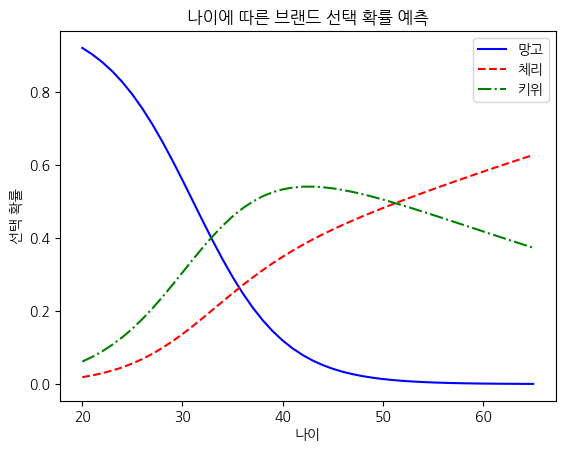

In [ ]:
# 피처 구간 설정
interval=pd.DataFrame(np.arange(20, 66), columns=["나이"])
interval
# 예측 확률
probs=model.predict_proba(interval)
probs

# 클래스별 확률 추출
prob_0=probs[:, 0]  # 망고
prob_1=probs[:, 1]  # 체리
prob_2=probs[:, 2]  # 키위

# 그래프
plt.plot(interval, prob_0, "b-", label="망고")
plt.plot(interval, prob_1, "r--", label="체리")
plt.plot(interval, prob_2, "g-.", label="키위")
plt.xlabel("나이"); plt.ylabel("선택 확률")
plt.legend(); plt.title("나이에 따른 브랜드 선택 확률 예측")
plt.show()

📌[실습 02-40] 로지스틱 회귀 모델의 손실값 계산하기

In [ ]:
loss=log_loss(y, y_prob)
print("크로스 엔트로피 손실 =", loss)

크로스 엔트로피 손실 = 0.83656658125409


📌[실습 02-41] 로지스틱 회귀 모델의 예측 성능 시각화하기

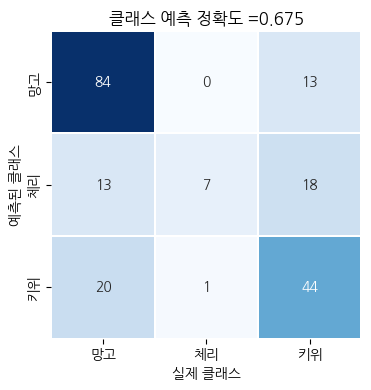

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

class_labels=["망고", "체리", "키위"] # 클래스 이름 리스트 (인덱스 순서대로)
cm=confusion_matrix(y, y_pred)      # 혼동행렬 계산
acc=accuracy_score(y, y_pred)       # 실제 클래스와 예측 클래스의 일치 비율 계산

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True,linewidths=0.1, cmap='Blues', cbar=None,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title(f'클래스 예측 정확도 ={acc:.3f}')
plt.xlabel('실제 클래스')
plt.ylabel('예측된 클래스')
plt.show()

📌[실습 02-42] 피처를 추가해 로지스틱 회귀 모델 개선하기

크로스 엔트로피 손실 = 0.47303239744701564


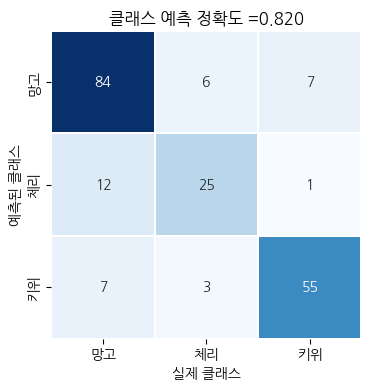

In [ ]:
# 변수 지정
X=df[['나이', '소득']]
y=df['브랜드_idx']

# 로지스틱 회귀 분석
model=LogisticRegression(max_iter=1000)
model.fit(X, y)

# 클래스별 확률과 인덱스 예측
y_prob=model.predict_proba(X)  # 확률
y_pred=model.predict(X);       # 인덱스

# 손실 계산
loss=log_loss(y, y_prob)
print("크로스 엔트로피 손실 =", loss)

class_labels=["망고", "체리", "키위"] # 클래스 이름 리스트 (인덱스 순서대로)
cm=confusion_matrix(y, y_pred)      # 혼동행렬 계산
acc=accuracy_score(y, y_pred)       # 실제 클래스와 예측 클래스의 일치 비율 계산

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True,linewidths=0.1, cmap='Blues', cbar=None,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title(f'클래스 예측 정확도 ={acc:.3f}')
plt.xlabel('실제 클래스'); plt.ylabel('예측된 클래스'); plt.show()


📌[실습 02-43] 예측용 데이터 프레임 만들기

In [ ]:
interval=np.arange(150, 960,10)
X_plot=pd.DataFrame({    # 딕셔너리를 데이터프레임으로 변환
    '나이': 30,  # 고정
    '소득': interval
    })
X_plot

,나이,소득
0,30,150
1,30,160
2,30,170
3,30,180
4,30,190
...,...,...
76,30,910
77,30,920
78,30,930
79,30,940


📌[실습 02-44] 소득 구간에 따른 브랜드 선택 확률 시각화하기

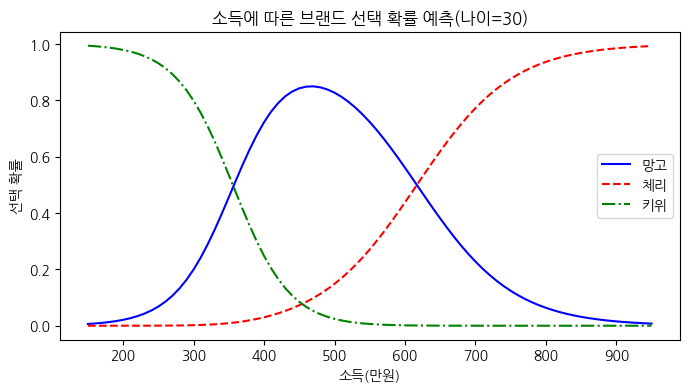

In [ ]:
# 확률 예측
probs=model.predict_proba(X_plot)

# 클래스별 확률 추출
prob_0=probs[:, 0]  # 망고
prob_1=probs[:, 1]  # 체리
prob_2=probs[:, 2]  # 키위

# 확률 시각화
plt.figure(figsize=(8, 4))
plt.plot(interval, prob_0, 'b-', label="망고")
plt.plot(interval, prob_1, 'r--', label="체리")
plt.plot(interval, prob_2, 'g-.', label="키위")

plt.xlabel("소득(만원)");plt.ylabel("선택 확률")
plt.legend(); plt.title("소득에 따른 브랜드 선택 확률 예측(나이=30)")
plt.show()

**새로운 피쳐를 학습된 모델에 입력해서 어떤 브랜드를 선택할지 예측해봅시다**

📌[실습 02-45] 학습된 로지스틱 회귀 모델로 예측해보기

In [ ]:
import warnings; warnings.filterwarnings('ignore')

x_new=[[25, 550]]  # 나이, 소득               # 고객 피쳐 설정
probs=model.predict_proba(x_new)              # 클래스별 확률 예측
pred_index = model.predict(x_new)             # 확률이 가장 높은 클래스 인덱스
pred_brand= le.inverse_transform(pred_index)  # 역함수: 인덱스 --> 클래스 이름
print(f"이 소비자는 {np.max(probs):.3f}의 확률로 {pred_brand}를 선택할 것으로 예측됩니다.")


이 소비자는 0.877의 확률로 ['망고']를 선택할 것으로 예측됩니다.


📌[실습 02-46] 선택 확률 시각화하기

[[0.87673456 0.12215676 0.00110869]]


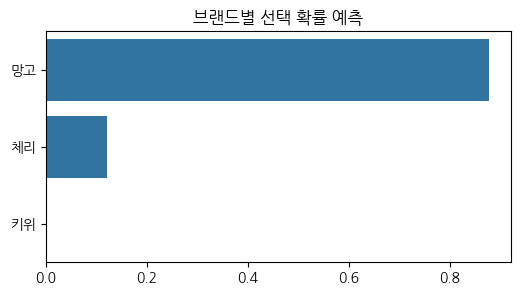

In [ ]:
# 브랜드별 선택 확률 예측
print(probs)
plt.figure(figsize=(6, 3))
sns.barplot(x=probs[0], y=class_labels) #prob[0]는 2차원 배열인 prob을 1차원 배열로 바꾼 것
plt.title("브랜드별 선택 확률 예측")
plt.show()